<a href="https://colab.research.google.com/github/saiprasadlaxmeshwar/Goldman-sachs-closing-stock-price-prediction-using-Neural-Networks/blob/master/Recurrent_neural_network(LSTM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Predicting Goldman sachs closing stock price for 08/24/2020 using Recurrent neural network with LSTM.

In [1]:
#import libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
#get stocks
df = web.DataReader('GS', data_source='yahoo',start='1999-06-01',end='2020-08-21')
df


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1999-06-01,66.625000,63.562500,66.625000,64.187500,953900.0,50.594078
1999-06-02,64.062500,62.000000,63.750000,63.250000,2204300.0,49.855118
1999-06-03,64.187500,63.125000,64.000000,63.625000,852600.0,50.150673
1999-06-04,67.000000,64.312500,64.312500,65.375000,1357400.0,51.530079
1999-06-07,67.750000,65.187500,65.187500,65.937500,891900.0,51.973465
...,...,...,...,...,...,...
2020-08-17,207.850006,202.529999,207.000000,203.070007,3922600.0,203.070007
2020-08-18,203.580002,201.100006,203.449997,201.309998,3067900.0,201.309998
2020-08-19,206.100006,201.770004,202.399994,203.020004,2458500.0,203.020004


In [3]:


df.shape


(5343, 6)

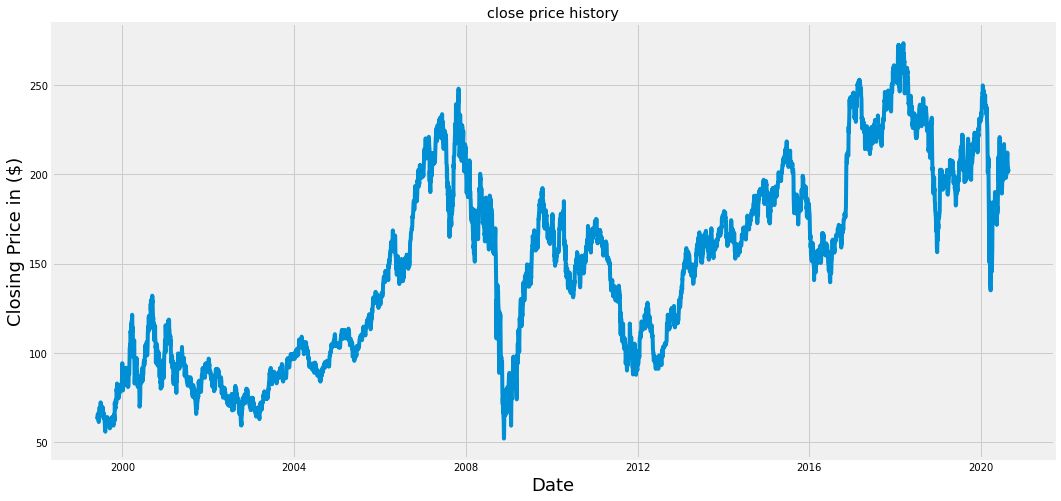

In [4]:
#visualize the data
plt.figure(figsize=(16,8))
plt.title('close price history')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Closing Price in ($)', fontsize=18)
plt.show()


In [5]:
#Create a new dataframe with only closing price column.
data = df.filter(['Close'])

#Convert the dataframe into numpy array
dataset = data.values

In [6]:
#Get the rows to train the lstm model.
training_data_len = math.ceil(len(dataset)*.80)
training_data_len

4275

In [7]:
#scale  the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data= scaler.fit_transform(dataset)
scaled_data


array([[0.0550524 ],
       [0.0508176 ],
       [0.05251152],
       ...,
       [0.68217545],
       [0.67689043],
       [0.6795103 ]])

In [8]:
#create the training dataset
#create scaled training dataset
train_data = scaled_data[0:training_data_len , :]
#split the data into x_train and y_train
x_train = []
y_train= []

for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i <= 60 :
    print(x_train)
    print(y_train)
    print()


[array([0.0550524 , 0.0508176 , 0.05251152, 0.06041648, 0.06295736,
       0.05307616, 0.06098112, 0.05138224, 0.0508176 , 0.04178336,
       0.04855904, 0.05985184, 0.05872256, 0.0578756 , 0.0790496 ,
       0.07227392, 0.05872256, 0.05900488, 0.06436896, 0.06578056,
       0.07114464, 0.09147168, 0.08497832, 0.08554296, 0.08356672,
       0.07227392, 0.06888608, 0.06888608, 0.07396784, 0.07170928,
       0.07058   , 0.0719916 , 0.07255624, 0.07876728, 0.07283856,
       0.07170928, 0.06549824, 0.05448776, 0.0508176 , 0.06098112,
       0.063522  , 0.05872256, 0.05561704, 0.04884136, 0.03980712,
       0.03613696, 0.03274912, 0.01919776, 0.01722152, 0.0225856 ,
       0.04291264, 0.03924248, 0.05025296, 0.04912368, 0.04968832,
       0.0465828 , 0.04319496, 0.0465828 , 0.05251152, 0.05166456])]
[0.05420543741677211]



In [9]:
#convert X and Y Train into numpy arrays.
x_train,y_train = np.array(x_train),np.array(y_train)


In [10]:
#Reshape the data as the lstm model expects data to be 3 dimensional.
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape


(4215, 60, 1)

In [11]:
#Lets Build the lstm model
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
132/132 [==============================] - 2s 14ms/step - loss: 0.0084
Epoch 2/100
132/132 [==============================] - 2s 14ms/step - loss: 0.0028
Epoch 3/100
132/132 [==============================] - 2s 15ms/step - loss: 0.0028
Epoch 4/100
132/132 [==============================] - 2s 14ms/step - loss: 0.0023
Epoch 5/100
132/132 [==============================] - 2s 15ms/step - loss: 0.0021
Epoch 6/100
132/132 [==============================] - 2s 15ms/step - loss: 0.0019
Epoch 7/100
132/132 [==============================] - 2s 14ms/step - loss: 0.0018
Epoch 8/100
132/132 [==============================] - 2s 14ms/step - loss: 0.0017
Epoch 9/100
132/132 [==============================] - 2s 14ms/step - loss: 0.0018
Epoch 10/100
132/132 [==============================] - 2s 14ms/step - loss: 0.0016
Epoch 11/100
132/132 [==============================] - 2s 14ms/step - loss: 0.0014
Epoch 12/100
132/132 [==============================] - 2s 14ms/step - loss: 0.0014
E

In [12]:
#create Testing dataset
#create a new array containing scaled values from index 1677 till 2171
test_data= scaled_data[training_data_len-60: , :] 
#Lets create x_test and y_test dataset
x_test=[]
y_test= dataset[training_data_len:,:]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i,0])




In [13]:
#CConvert a numpy array of x_test
x_test= np.array(x_test)
x_test.shape

(1068, 60)

In [14]:
#lets reshape the data
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
x_test.shape

(1068, 60, 1)

In [15]:
#Get models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [16]:
#now lets evaluate the model with RMSE metric
rmse= np.sqrt(np.mean(predictions-y_test)**2)
rmse


2.4425976499636075

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


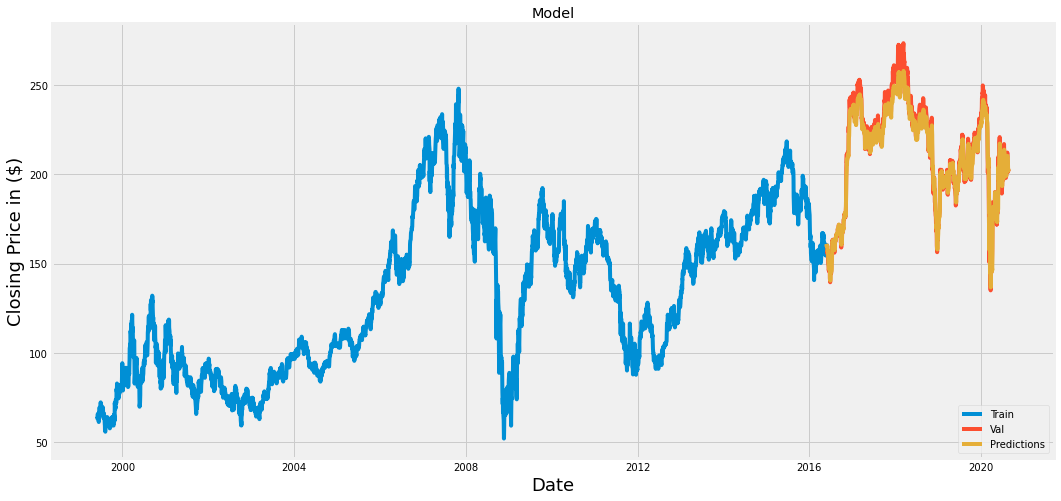

In [17]:

#plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the Plot
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Closing Price in ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'], loc= 'lower right')
plt.show()


In [18]:
valid

,Close,Predictions
Date,,
2016-05-26,159.220001,160.855988
2016-05-27,159.529999,159.841339
2016-05-31,159.479996,159.806061
2016-06-01,159.970001,159.653458
2016-06-02,159.279999,160.046921
...,...,...
2020-08-17,203.070007,207.249466
2020-08-18,201.309998,203.546860
2020-08-19,203.020004,201.748993


In [32]:

#Get the Quote
GS_quote= web.DataReader('GS', data_source='yahoo',start='2003-01-01',end='2020-08-21')
#create new data frame
GS_df= GS_quote.filter(['Close'])
#Get last 60 days closing price
last_60_days= GS_df[-60:].values
#scale the data
last_60_days_scaled = scaler.transform(last_60_days)
#create an empty list
X_test = []
#append the last 60 days prices to X_test
X_test.append(last_60_days_scaled)
#lets convert X_test to a Numpy array
X_test = np.array(X_test)
#Reshape the data to 3 dimentional
X_test= np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
#Get the predicted scaled price
pred_price= model.predict(X_test)
#inverse Transform the Scaled data 
pred_price= scaler.inverse_transform(pred_price)


In [33]:
#Goldman Sachs Closing Stock Price Predictions for 08/24/2020
print(pred_price)



[[202.43855]]
